# Argument Structure

Hier ist die Struktur von Argumenten in einem Text visualisiert. Hierzu wurden die annotierten Daten des ... Datensatzes herangezogen. Demnahc wird zwischen MajorClaims, Claims und Premises unterschieden.
- MajorClaims sind die Hauptargumente eines Textes.
- Claims (Behauptung) sind die Unterargumente eines MajorClaims.
- Premises (Prämisse) sind die Unterargumente eines Claims.

Diese Argumentationskomponenten weisen untereinander Beziehungen auf. Ein MajorClaim kann mehrere Claims enthalten, ein Claim kann mehrere Premises enthalten. Es können mehrere MajorClaims vorhanden sein. Hierbei wurde jedoch nicht annotiert, welche Claims zu welchen MajorClaims gehören. 
- Ein Claim hat als einziges einen Stance (for, against), der angibt, ob das Argument für oder gegen das MajorClaim ist.
- Ein MajorClaim hat keinen Stance, da es das Hauptargument darstellt.
- Premisses können einen Claim unsterstützen (support) oder widerlegen (attack).

In [15]:
from graphviz import Digraph
from IPython.display import Image

In [16]:
# Create a new Digraph object
dot = Digraph()

dot.node('Hauptaussage', 'Hauptaussage(n)', shape='record', style='rounded')

# Create subgraphs for Hauptaussage, Behauptungen, and Prämissen
with dot.subgraph(name='cluster_claims') as c:
    c.attr(style='dashed')
    c.node('Behauptung 1', 'Behauptung 1', shape='record', style='rounded')
    c.node('Behauptung 2', 'Behauptung 2', shape='record', style='rounded')
    c.attr(label='Behauptungen')

with dot.subgraph(name='cluster_premises') as c:
    c.attr(style='dashed')
    c.node('Prämisse 1', 'Prämisse 1', shape='record', style='rounded')
    c.node('Prämisse 2', 'Prämisse 2', shape='record', style='rounded')
    c.attr(label='Prämissen')

# Set the rank direction
dot.attr(rankdir='RL')

# Create the edges
dot.edge('Behauptung 1', 'Hauptaussage', color='red', label='dagegen')
dot.edge('Behauptung 2', 'Hauptaussage', color='green', label='dafür')
dot.edge('Prämisse 1', 'Behauptung 1', color='red', label='greift an')
dot.edge('Prämisse 2', 'Behauptung 1', color='green', label='unterstützt')
dot.edge('Prämisse 1', 'Prämisse 2', color='red', label='greift an')
dot.edge('Prämisse 2', 'Prämisse 1', color='green', label='unterstützt')

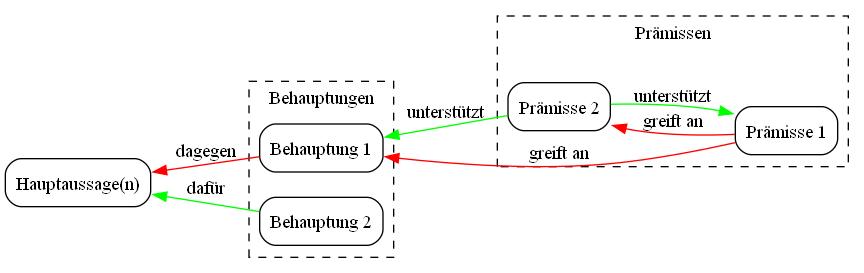

In [17]:
# dot.render('graph', format='png', cleanup=True)
dot.format = 'png'
dot.render('Argumentationsstruktur')
Image('Argumentationsstruktur.png')

# Prozess

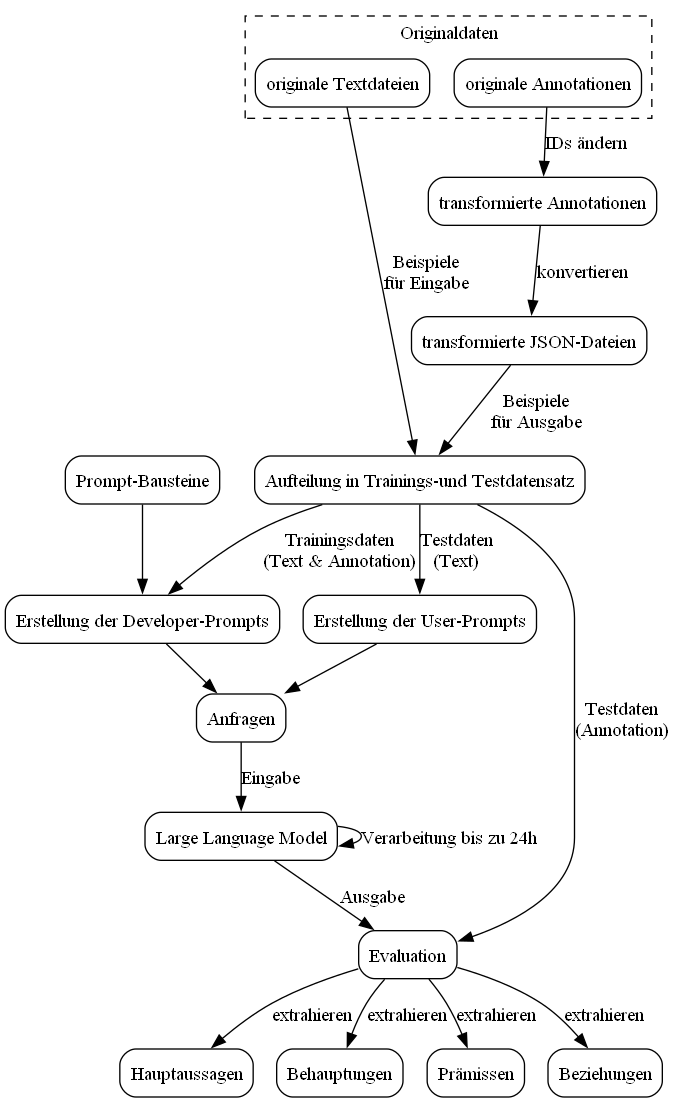

In [35]:
llm = Digraph()

# Set the rank direction
llm.attr(rankdir='TB')

# Create a subgraph for the original data
with llm.subgraph(name='cluster_orig_data') as c:
    c.attr(style='dashed')
    c.node('orig_data_txt', 'originale Textdateien', shape='record', style='rounded')
    c.node('orig_data_ann', 'originale Annotationen', shape='record', style='rounded')
    c.attr(label='Originaldaten')

# Create the other nodes
llm.node('transformed_data_ann', 'transformierte Annotationen', shape='record', style='rounded')
llm.node('transformed_data_JSON', 'transformierte JSON-Dateien', shape='record', style='rounded')
llm.node('developer', 'Erstellung der Developer-Prompts', shape='record', style='rounded')
llm.node('user', 'Erstellung der User-Prompts', shape='record', style='rounded')
llm.node('prompts', 'Anfragen', shape='record', style='rounded')
llm.node('LLM', 'Large Language Model', shape='record', style='rounded')



#llm.node('Database', 'Datenbank', shape='record', style='rounded')
llm.node('Evaluation', 'Evaluation', shape='record', style='rounded')
llm.node('split', 'Aufteilung in Trainings-und Testdatensatz ', shape='record', style='rounded')
llm.node('blocks', 'Prompt-Bausteine', shape='record', style='rounded')
llm.node('mc', 'Hauptaussagen', shape='record', style='rounded')
llm.node('c', 'Behauptungen', shape='record', style='rounded')
llm.node('p', 'Prämissen', shape='record', style='rounded')
llm.node('r', 'Beziehungen', shape='record', style='rounded')

# Create the edges for the process
line_color = 'black'
llm.edge('orig_data_ann', 'transformed_data_ann', color=line_color, label='IDs ändern')
llm.edge('transformed_data_ann', 'transformed_data_JSON', color=line_color, label='konvertieren')
llm.edge('transformed_data_JSON', 'split', color=line_color, label='Beispiele\nfür Ausgabe')
#llm.edge('orig_data_txt', 'developer', color=line_color, label='Beispiele eingeben')
llm.edge('developer', 'prompts', color=line_color)
llm.edge('user', 'prompts', color=line_color)
llm.edge('prompts', 'LLM', color=line_color, label='Eingabe')
llm.edge('LLM', 'Evaluation', color=line_color, label='Ausgabe')
#llm.edge('Database', 'Evaluation', color=line_color, label='')
llm.edge('orig_data_txt', 'split', color=line_color, label='Beispiele\nfür Eingabe')
llm.edge('split', 'developer', color=line_color, label='Trainingsdaten\n(Text & Annotation)')
llm.edge('split', 'user', color=line_color, label='Testdaten\n(Text)')
llm.edge('split', 'Evaluation', color=line_color, label='Testdaten\n(Annotation)')

llm.edge('LLM', 'LLM', color=line_color, label='Verarbeitung bis zu 24h')
llm.edge('Evaluation', 'mc', color=line_color, label='extrahieren')
llm.edge('Evaluation', 'c', color=line_color, label='extrahieren')
llm.edge('Evaluation', 'p', color=line_color, label='extrahieren')
llm.edge('Evaluation', 'r', color=line_color, label='extrahieren')
llm.edge('blocks', 'developer', color=line_color)

# Render and display the updated graph
llm.format = 'png'
llm.render('Prozess')
Image('Prozess.png')